In [ ]:
from google.colab import drive
import sys

drive.mount('/content/gdrive')
gdrive_path = "/content/gdrive/MyDrive/AIM/"
sys.path.append(gdrive_path)
!ls -l /content/gdrive/MyDrive/AIM/citizen*.*
import aim_util

Mounted at /content/gdrive
-rw------- 1 root root    2696 Apr 15 14:07 /content/gdrive/MyDrive/AIM/citizen_1864_20240414_213308040_groundtruth.txt
-rw------- 1 root root 3663644 Apr 14 21:34 /content/gdrive/MyDrive/AIM/citizen_1864_20240414_213308040.jpg
-rw------- 1 root root    2696 May  2 20:40 /content/gdrive/MyDrive/AIM/citizen_1864_groundtruth_annotated.txt
-rw------- 1 root root    3899 May  3 15:25 /content/gdrive/MyDrive/AIM/citizen_1864_groundtruth_word_list_lower.txt
-rw------- 1 root root    3899 May  3 15:25 /content/gdrive/MyDrive/AIM/citizen_1864_groundtruth_word_list.txt
-rw------- 1 root root    3899 May  3 15:25 /content/gdrive/MyDrive/AIM/citizen_1864_groundtruth_word_string_lower.txt
-rw------- 1 root root    3899 May  3 15:25 /content/gdrive/MyDrive/AIM/citizen_1864_groundtruth_word_string.txt
-rw------- 1 root root 3663644 Apr 23 20:54 /content/gdrive/MyDrive/AIM/citizen_1864_rescan.jpg
-rw------- 1 root root   19026 May 17 17:07 /content/gdrive/MyDrive/AIM/citize

In [ ]:
image_path = '/content/gdrive/MyDrive/AIM/citizen_1864_rescan.jpg'
preds_path = '/content/gdrive/MyDrive/AIM/citizen_1864_xform0_carlv_bbox.pkl'
font_path = '/content/gdrive/MyDrive/AIM/OpenSans-Regular.ttf'
overlay_image_pathA = '/content/gdrive/MyDrive/AIM/overlay_image_A.jpg'
overlay_image_pathB = '/content/gdrive/MyDrive/AIM/overlay_image_B.jpg'

In [ ]:
# Model A
import cv2
import numpy as np
import pickle
from PIL import ImageDraw, Image, ImageFont

# Load the pickle file
with open(preds_path, 'rb') as f:  # make sure to replace preds_path with the actual path to the file
  preds = pickle.load(f)

preds_cleaned = preds
#Filter words with less than 3 characters
# preds_cleaned = []
# for word, box in preds:
#     if len(word) >= 3:
#         preds_cleaned.append((word, box))
# print("Remaining list of words:")
# [print(word) for word, _ in preds_cleaned]  # Updated print statement

# Load the image
#image_path = 'path/to/image'  # Replace with the actual path to the image file
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Set up font and color for the text overlay
font = ImageFont.truetype(font_path, 30)
# If the above path doesn't work, you can download the font and provide the path locally.
color = (0, 255, 0)  # Green color for the text

# Overlay bounding box and word on the image
count_overlays = 0
for word, upper_left_X, upper_left_Y, lower_left_X, lower_left_Y, lower_right_X, lower_right_Y, upper_right_X, upper_right_Y in preds_cleaned:
    x, y, w, h = cv2.boundingRect(box)
    text_size = cv2.getTextSize(word, cv2.FONT_HERSHEY_SIMPLEX, 1, 2)[0]

    # ensure the text is within the bounding box
    text_x = x
    text_y = y - text_size[1]

    if text_x < 0:
        text_x = 0
    if text_y < 0:
        text_y = 0

    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
    cv2.putText(img, word, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)
    count_overlays += 1

# Save the modified image
output_image_path = overlay_image_pathA  # Replace with the desired path
cv2.imwrite(output_image_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

print(f"Count of bounding box/word overlays: {count_overlays}")

ValueError: not enough values to unpack (expected 9, got 4)

In [ ]:
# Model B
import cv2
import numpy as np
import pickle
from PIL import ImageDraw, Image, ImageFont

# Load the pickle file
with open(preds_path, 'rb') as f:
  preds = pickle.load(f)

print(preds)
preds_cleaned = preds

#Filter words with less than 3 characters
# preds_cleaned = [(word, box) for word, box in preds if len(word) >= 3]
# print("Remaining list of words:")
# print([word for word, _ in preds_cleaned])

# Load the image
#image_path = 'path/to/your/image.jpg'
img = cv2.imread(image_path)

# Set the font and size for the text overlay
font = ImageFont.truetype(font_path, 30)

#Create a new copy of the image for overlay
overlay = img.copy()
count_overlays = 0

for word, upper_left_X, upper_left_Y, lower_left_X, lower_left_Y, lower_right_X, lower_right_Y, upper_right_X, upper_right_Y in preds_cleaned:
    # Convert the box coordinates to integers
    box = box.astype(int)
    x, y, w, h = cv2.boundingRect(box)

    # Draw the bounding box on the image
    cv2.rectangle(overlay, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Ensure the text is within the bounding box
    text_size = cv2.getTextSize(word, font, 1, 2)[0]
    text_width, text_height = text_size

    if text_width < w and text_height < h:
        count_overlays += 1
        # Draw the text overlay on the image
        cv2.putText(overlay, word, (x, y + h), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

#Save the modified image
output_image_path = overlay_image_pathB
cv2.imwrite(output_image_path, overlay)

print(f"Count of bounding box/word overlays: {count_overlays}")

         word  upper_left_X  upper_left_Y  lower_left_X  lower_left_Y  \
0           c     75.703125     39.843750    111.562500     39.843750   
1      united    628.225586    214.346313   1150.899780    204.390610   
2      states   1207.265625    219.140625   1741.171875    219.140625   
3     america   2018.740723    227.915924   2668.840332    216.306961   
4          of   1785.000000    223.125000   1956.328125    223.125000   
..        ...           ...           ...           ...           ...   
447     court   2593.828125   3689.531250   2689.453125   3689.531250   
448  district   2452.797607   3692.262695   2585.499023   3685.943848   
449     clerk   2298.984375   3697.500000   2394.609375   3697.500000   
450         f   2398.593750   3697.500000   2442.421875   3697.500000   
451         n    207.187500   3773.203125    258.984375   3773.203125   

     lower_right_X  lower_right_Y  upper_right_X  upper_right_Y  
0       111.562500      91.640625      75.703125      91.

ValueError: not enough values to unpack (expected 9, got 4)

Remaining list of words:
['united', 'states', 'america', 'ralling', 'luere', 'iowa', 'state', 'sss', 'cunty', 'scott', 'that', 'term', 'the', 'district', 'and', 'for', 'renteutbeted', 'court', 'holden', 'said', 'county', 'the', 'ovcm', 'elc', 'day', 'the', 'the', 'lord', 'davenport', 'theein', 'year', 'our', 'city', 'one', 'susty', 'fuw', 'hororable', 'richmany', 'the', 'scott', 'and', 'present', 'sole', 'thousand', 'eight', 'was', 'prsiding', 'hundre', 'and', 'sheriff', 'said', 'county', 'ira', 'gifford', 'clerk', 'said', 'court', 'lyter', 'whenthe', 'john', 'fol', 'judge', 'cans', 'olen', 'anws', 'had', 'towits', 'roceedings', 'lowing', 'other', 'were', 'among', 'native', 'cout', 'said', 'stater', 'appeared', 'lile', 'resian', 'open', 'icctolente', 'vltmm', 'aemitted', 'prcsens', 'oeceme', 'loc', 'and', 'the', 'satifaction', 'uited', 'states', 'appearing', 'the', 'court', 'thie', 'that', 'citizen', 'had', 'declaredn', 'oath', 'ssked', 'roadwo', 'oww', 'oouns', 'cot', 'before', 'juris

<ipython-input-16-e4cd48d0ea8a>:50: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(word, font)
<ipython-input-16-e4cd48d0ea8a>:50: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(word, font)
<ipython-input-16-e4cd48d0ea8a>:50: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(word, font)
<ipython-input-16-e4cd48d0ea8a>:50: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(word, font)
<ipython-input-16-e4cd48d0ea8a>:50: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(wo

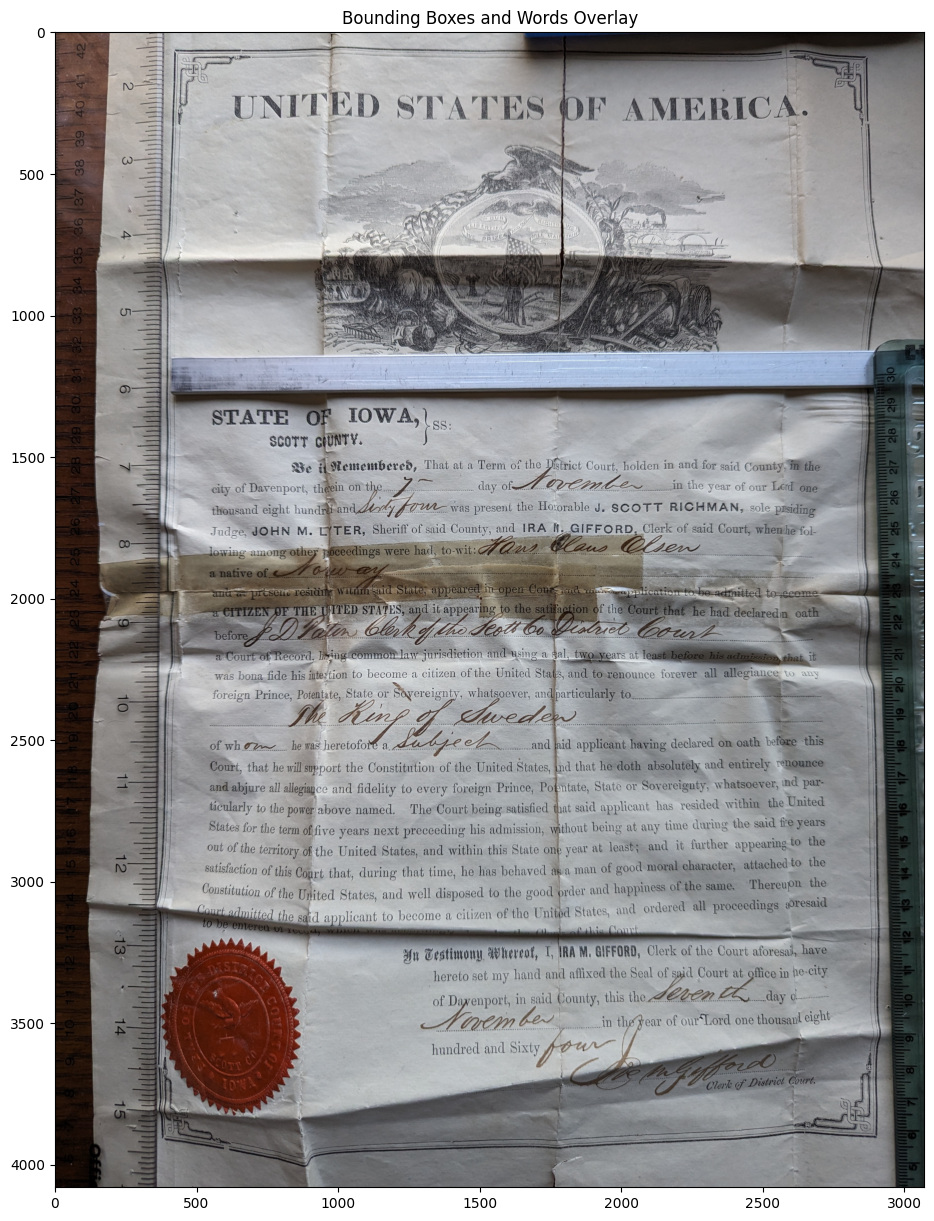

Count of bounding box/word overlays: 296


In [ ]:
# Model A
import pickle
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#Load the pickle file
with open(preds_path, 'rb') as f:
    preds_df = pd.DataFrame(pickle.load(f))

#Filter words with less than 3 characters
preds_df = preds_df[preds_df.word.str.len() >= 3]

print("Remaining list of words:")
print(preds_df.word.tolist())

# Set the path to the image
#image_path = 'path/to/your/image.jpg'

#Load the image using PIL
img = Image.open(image_path)

#Set the font and size for the text overlay
font = ImageFont.truetype(font_path, 30)

fig,(ax1) = plt.subplots(1,1, figsize=(15,15))
ax1.set_title("Bounding Boxes and Words Overlay")

#Plotting the image
ax1.imshow(img)

count_overlays = 0

# Iterate over the rows of the DataFrame to extract words and bounding boxes
for idx, row in preds_df.iterrows():
    word = row['word']

    # Extract and arrange the bounding box coordinates from the dataframe
    bbox = [row['upper_left_X'], row['upper_left_Y'], row['lower_right_X'], row['lower_right_Y']]

    #Draw the bounding box and text on the image using PIL
    draw = ImageDraw.Draw(img)
    draw.rectangle(bbox, outline=(0,255,0))

    # Ensure the text is within the bounding box
    text_size = draw.textsize(word, font)
    text_width, text_height = text_size

    if text_width < (bbox[2] - bbox[0]) and text_height < (bbox[3] - bbox[1]):
        # Calculate the center of the bounding box to position the text
        text_xy = ((bbox[0] + bbox[2]) // 2, (bbox[1] + bbox[3] // 2))
        draw.text(text_xy, word, (0, 0, 255), font=font)
        count_overlays += 1
del draw

#display the modified image with overlay
plt.show()

output_image_path = overlay_image_pathA
img.save(output_image_path, 'JPEG')

print(f"Count of bounding box/word overlays: {count_overlays}")

Remaining list of words:
['united', 'states', 'america', 'ralling', 'luere', 'iowa', 'state', 'sss', 'cunty', 'scott', 'that', 'term', 'the', 'district', 'and', 'for', 'renteutbeted', 'court', 'holden', 'said', 'county', 'the', 'ovcm', 'elc', 'day', 'the', 'the', 'lord', 'davenport', 'theein', 'year', 'our', 'city', 'one', 'susty', 'fuw', 'hororable', 'richmany', 'the', 'scott', 'and', 'present', 'sole', 'thousand', 'eight', 'was', 'prsiding', 'hundre', 'and', 'sheriff', 'said', 'county', 'ira', 'gifford', 'clerk', 'said', 'court', 'lyter', 'whenthe', 'john', 'fol', 'judge', 'cans', 'olen', 'anws', 'had', 'towits', 'roceedings', 'lowing', 'other', 'were', 'among', 'native', 'cout', 'said', 'stater', 'appeared', 'lile', 'resian', 'open', 'icctolente', 'vltmm', 'aemitted', 'prcsens', 'oeceme', 'loc', 'and', 'the', 'satifaction', 'uited', 'states', 'appearing', 'the', 'court', 'thie', 'that', 'citizen', 'had', 'declaredn', 'oath', 'ssked', 'roadwo', 'oww', 'oouns', 'cot', 'before', 'juris

<ipython-input-17-136ecc487292>:64: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(text, font)
<ipython-input-17-136ecc487292>:64: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(text, font)
<ipython-input-17-136ecc487292>:64: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(text, font)
<ipython-input-17-136ecc487292>:64: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(text, font)
<ipython-input-17-136ecc487292>:64: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(te

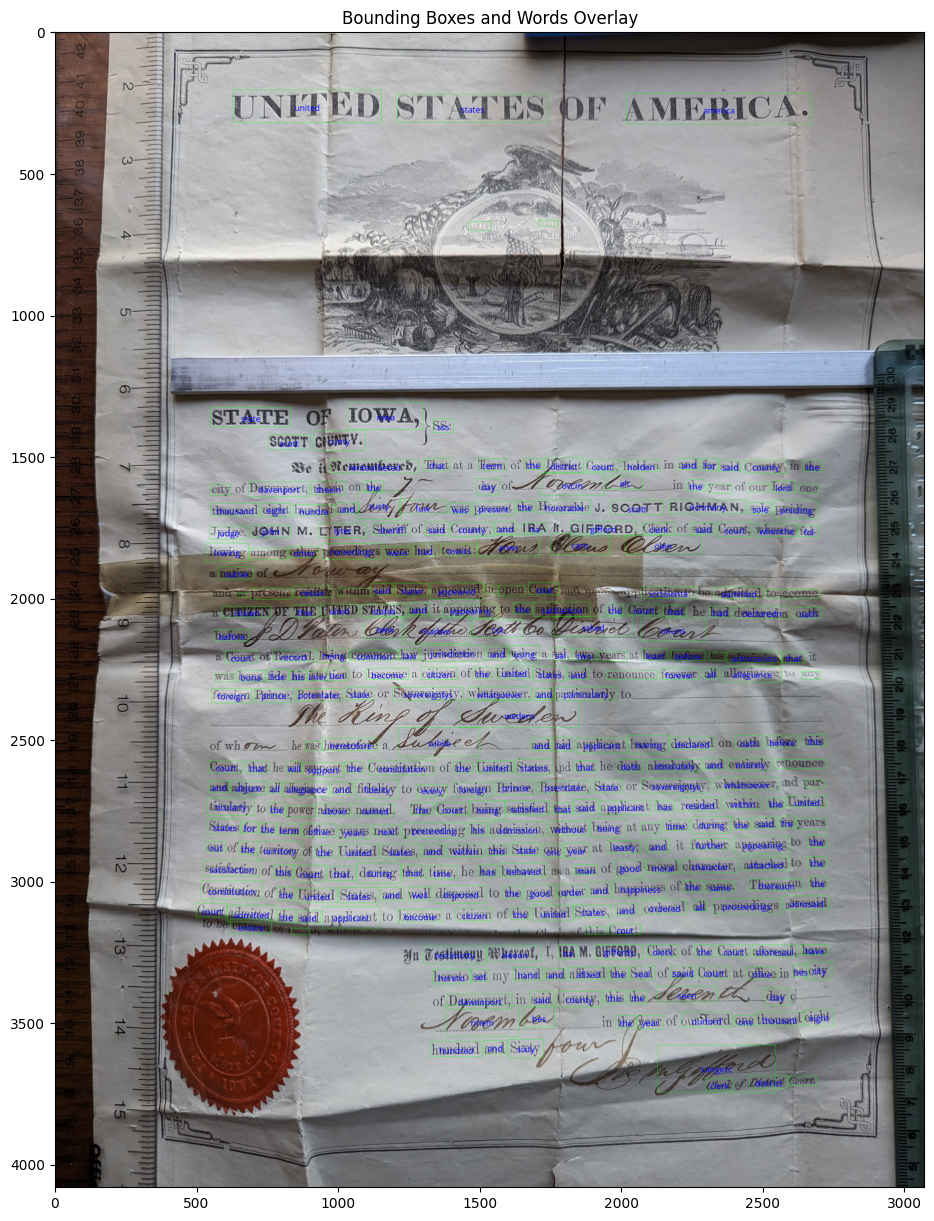

Count of bounding box/word overlays: 307


In [ ]:
# Model B
import pickle
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#Load the pickle file
with open(preds_path, 'rb') as f:
    preds = pickle.load(f)

#Convert the data to a pandas DataFrame
preds_df = pd.DataFrame(preds, columns = ['word', 'upper_left_X', 'upper_left_Y', 'lower_left_X', 'lower_left_Y', 'lower_right_X', 'lower_right_Y', 'upper_right_X', 'upper_right_Y'])

#Filter words with less than 3 characters
preds_df = preds_df[preds_df.word.str.len() >= 3]

print("Remaining list of words:")
print(preds_df.word.tolist())

# Set the path to the image
#image_path = 'path/to/your/image.jpg'

#Load the image using PIL
img = Image.open(image_path)

#Create a new copy of the image for overlay
overlay = img.copy()

#Set the font and size for the text overlay
font = ImageFont.truetype(font_path, 30)

fig,(ax1) = plt.subplots(1,1, figsize=(15,15))
ax1.set_title("Bounding Boxes and Words Overlay")
sns.set_style("white")

count_overlays = 0

# Iterate over the rows of the DataFrame
for idx, row in preds_df.iterrows():

    # Extract the bounding box coordinates
    x1, y1 = row['upper_left_X'], row['upper_left_Y']
    x2, y2 = row['lower_left_X'], row['lower_left_Y']
    x3, y3 = row['lower_right_X'], row['lower_right_Y']
    x4, y4 = row['upper_right_X'], row['upper_right_Y']

    #Calculate the bounding box rectangle to draw
    min_x = min(x1, x2, x3, x4)
    max_x = max(x1, x2, x3, x4)
    min_y = min(y1, y2, y3, y4)
    max_y = max(y1, y2, y3, y4)

    # Draw the bounding box on the image
    draw = ImageDraw.Draw(overlay)
    draw.rectangle((min_x, min_y, max_x, max_y), outline=(0, 255, 0))


    # Ensure the text is within the bounding box
    text = row['word']
    text_size = draw.textsize(text, font)
    text_width, text_height = text_size

    if max_x - min_x > text_width and max_y - min_y > text_height:
        # Calculate the center position for text
        text_x = min_x + ((max_x - min_x) / 2) - (text_width / 2)
        text_y = min_y + ((max_y - min_y) / 2) - (text_height / 2)
        draw.text((text_x, text_y), text, (0, 0, 255), font=font)
        count_overlays += 1

#Display the imaged with the overlays
ax1.imshow(overlay)

plt.show()

print(f"Count of bounding box/word overlays: {count_overlays}")

In [ ]:
!ls -l

total 8
drwx------ 5 root root 4096 May 17 19:37 gdrive
drwxr-xr-x 1 root root 4096 May 16 13:24 sample_data


In [ ]:
overlay.save(overlay_image_pathB)